<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/08_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B0%B0%EC%B9%98_%EC%A0%95%EA%B7%9C%ED%99%94_batch_norm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Normalization (배치 정규화)

## 1. 배치 정규화란?

배치 정규화(Batch Normalization)는  
**딥러닝 모델을 더 안정적이고 빠르게 학습시키기 위한 핵심 기법**이다.

딥러닝 모델, 특히 **레이어가 매우 깊은 경우**에는 학습이 불안정해지거나  
아예 학습이 진행되지 않는 문제가 자주 발생한다.  
배치 정규화는 이러한 문제를 완화해준다.

---

## 2. 문제 상황: 깊은 신경망에서 학습이 안 되는 이유

### 2.1 실험 설정

- 3개의 클래스로 구성된 데이터
- 매우 깊은 신경망 (10개 이상의 hidden layer)
- 활성화 함수: **tanh (Hyperbolic Tangent)**
- Loss: Cross Entropy Loss

### 2.2 문제 발생

- Validation loss가 약 **0.96에서 더 이상 감소하지 않음**
- 실제 분류 결과도 의미 없는 형태
- 학습이 사실상 멈춘 상태

### 2.3 원인: Vanishing Gradient

`tanh` 함수는 다음과 같은 특징을 가진다.

- 입력이 너무 크거나 작으면 출력이 **-1 또는 1 근처로 포화**
- 해당 구간에서는 **기울기(gradient)가 거의 0**

깊은 신경망에서는:
- 레이어를 지날수록 값이 점점 커지거나 작아짐
- 활성화 함수의 포화 구간에 자주 진입
- 역전파 시 gradient가 사라짐 (vanishing gradient)
- 결과적으로 학습이 진행되지 않음

---

## 3. 해결책: Batch Normalization 적용

### 3.1 배치 정규화를 적용했을 때

- 모든 activation 이전에 Batch Normalization 추가
- Validation loss가 빠르게 감소
- 모델이 3개의 클래스를 정상적으로 분류

➡️ **같은 네트워크 구조인데 BatchNorm 하나로 학습이 가능해짐**

---

## 4. Batch Normalization의 핵심 아이디어

Batch Normalization은 말 그대로 **배치 단위로 정규화**를 수행하는 레이어다.

### 4.1 배치 단위 통계 계산

각 배치에 대해:
- 평균(mean)
- 분산(variance)

을 계산한다.

### 4.2 표준화 (Standardization)

각 입력 값 `x`에 대해 다음 연산을 수행한다.

```

x̂ = (x - mean) / sqrt(variance + ε)

```

이렇게 하면:
- 평균이 0
- 분산이 1

인 입력이 활성화 함수로 전달된다.

➡️ 활성화 함수의 **의미 있는 구간**을 지속적으로 사용 가능

---

## 5. 그런데 이것만 하면 문제가 생긴다

모든 레이어에:
- 평균 0
- 분산 1

인 입력만 들어온다면?

➡️ 모든 레이어가 **똑같은 분포**만 보게 된다.  
➡️ 네트워크가 다양한 표현을 학습하기 어려워진다.

---

## 6. 해결: γ (Gamma)와 β (Beta)

Batch Normalization에는 **학습 가능한 파라미터**가 추가된다.

### 6.1 수식

```

y = γ * x̂ + β

````

### 6.2 역할

- **γ (Gamma)**: 스케일 (분포를 넓히거나 좁힘)
- **β (Beta)**: 시프트 (분포를 좌우로 이동)

➡️ 각 레이어가 **서로 다른 분포 형태의 입력**을 가질 수 있음  
➡️ 네트워크 표현력이 유지됨

### 6.3 파라미터 개수 예시

- 입력 feature 수: 4
- 각 feature마다 γ, β 존재

➡️ 총 **8개의 학습 파라미터** 추가

---

## 7. BatchNorm과 Bias의 관계

Batch Normalization 이후에는:

- Linear layer의 **bias 항이 의미를 잃음**
- 어차피 BatchNorm에서 평균을 다시 조정함

➡️ **BatchNorm 이전 Linear layer에서는 bias를 제거하는 것이 좋음**

PyTorch 예시:
```python
nn.Linear(in_features, out_features, bias=False)
````

➡️ 불필요한 연산 제거 + 효율 증가

---

## 8. 핵심 요약

* 깊은 신경망에서는 **vanishing gradient** 문제가 발생
* Batch Normalization은 배치 단위로 입력을 정규화
* 활성화 함수에 안정적인 입력을 제공
* γ, β를 통해 표현력 유지
* 학습 속도와 안정성이 크게 향상됨
* BatchNorm 앞의 Linear bias는 제거하는 것이 일반적

---

# Batch Normalization: 테스트 시 특징과 무빙 애버리지

## 1. 배치 정규화 복습

- 딥 뉴럴넷 학습 시, **vanishing gradient** 문제 발생 가능
  - 포워드 패스에서 입력값이 극단적이면 gradient가 0 근처가 됨
  - 백프로파게이션이 제대로 동작하지 않음
- 배치 정규화(BatchNorm) 적용 전후 비교:
  - **없음**: Validation loss 0.96 근처에서 멈춤, 분류 실패
  - **있음**: Validation loss 감소, 3개 클래스로 정상 분류

### 핵심 기능

- 각 배치의 activation 입력을 **정규화**하여 안정적 학습
- 모든 입력이 동일한 정규분포만 가지면 학습 의미 없음
  - BatchNorm은 각 feature별로 **scale(γ), shift(β)** 적용
  - 다양한 분포 형태를 만들어 네트워크 학습 가능

### 파라미터 예시

- 입력 feature: 4개
- 학습 파라미터:
  - γ (Scale) ×4
  - β (Shift) ×4
- 총 8개의 학습 파라미터
- 이전 레이어의 bias는 BatchNorm 적용 시 의미 없음 → 제거 가능

---

## 2. 테스트 환경에서의 문제

- 학습 시: 배치 단위로 평균과 분산 계산 가능
- 테스트 시: 단일 입력 또는 배치가 작으면
  - 통계를 낼 수 없음 → 정규화 불가
- 이유:
  - 학습 시에는 데이터 샘플링이 랜덤(Statistical 의미 보장)
  - 테스트 시에는 입력 데이터 편향 가능 → 배치 통계 의미 상실

---

## 3. 해결책: 무빙 애버리지(Moving Average)

- 학습 시간 동안 **점진적으로 전체 데이터 평균/분산 추정**
- PyTorch: `momentum` 파라미터 사용 (기본값 0.1)
- 계산 방식 예시:
  1. 이전 평균 × (1 - momentum) + 새로운 값 × momentum
  2. 새로운 데이터 들어올 때마다 반복
- 결과: 테스트 시에도 **전체 데이터 통계를 근사** 가능

---

## 4. 최종 BatchNorm 파라미터 구조

- 하나의 feature에 대한 파라미터: 4개
  1. Scale (γ)
  2. Shift (β)
  3. Moving mean
  4. Moving variance
- 학습 과정:
  - γ, β → 백프로파게이션으로 학습
  - Moving mean, variance → 무빙 애버리지로 추정
- 입력 feature 4개 기준:
  - 총 16개의 파라미터 (4개 × 4 feature)

---

## 5. Train 모드 vs Eval 모드

- BatchNorm 레이어 특성 때문에:
  - **학습 시**: `model.train()` → 배치 통계 사용
  - **테스트/추론 시**: `model.eval()` → 이동 평균 사용
- 딥러닝 초보자들이 흔히 하는 실수:
  - 테스트 시 Train 모드로 두는 것 → 성능 저하

---

## 6. 활성화 함수와 BatchNorm

- ReLU, tanh 등 함수에서 gradient 문제 존재
  - ReLU: 음수 영역 gradient 0 → dying ReLU 문제
  - BatchNorm 적용 시, 이러한 문제 완화 가능

---

## 7. 추가 효과

- BatchNorm은 학습 안정화 뿐 아니라:
  - **Regularization 효과**도 있음 → 모델 일반화에 도움
  - 오버피팅 방지에 기여 가능

---

## 8. 요약

1. BatchNorm은 **배치 단위 정규화**로 학습 안정화
2. Scale(γ), Shift(β)로 **각 레이어 다양한 입력 분포 유지**
3. 학습 시 Batch 통계 → 테스트 시 무빙 애버리지 활용
4. 이전 Linear layer bias는 불필요 → 제거 가능
5. Train/Eval 모드 구분 필수
6. Gradient 문제 완화 및 regularization 효과

---

## 9. 다음 학습 주제

- Regularization과 Overfitting 문제 해결
- Dropout 레이어 학습


In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/classify_3c_5k.csv')
print(df.head())
# Convert the DataFrame to a numpy array
data = df[['x', 'y']].values
labels = df['label'].values

# Print the shapes of the data and labels
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

          x         y  label
0  0.097627  0.430379      1
1  0.205527  0.089766      2
2 -0.152690  0.291788      1
3 -0.124826  0.783546      0
4  0.927326 -0.233117      0
Data shape: (5000, 2)
Labels shape: (5000,)


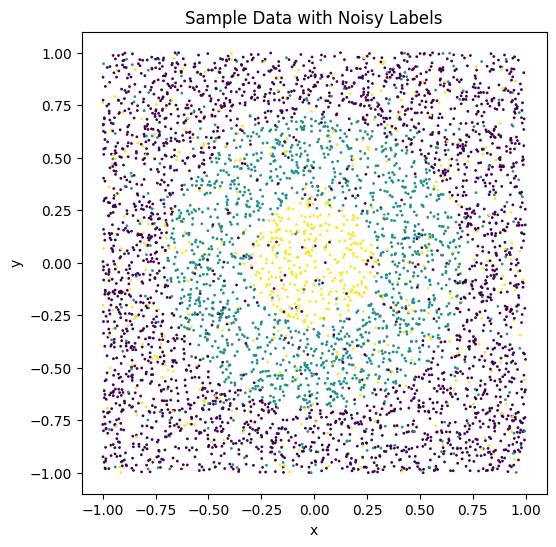

In [3]:
import matplotlib.pyplot as plt

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=1)
plt.title('Sample Data with Noisy Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.long)

data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape, train_labels.dtype)

torch.Size([4000, 2]) torch.Size([4000]) torch.int64


In [6]:
g = torch.Generator().manual_seed(42)

def get_batch(data, labels, batch_size=256):
    # Generate random indices
    indices = torch.randint(0, len(data), size=(batch_size,), generator= g)

    # Select the data and labels at these indices
    data_batch = data[indices]
    labels_batch = labels[indices]

    return data_batch, labels_batch

data_batch, labels_batch = get_batch(train_data,train_labels)
print(data_batch.shape, labels_batch.shape)

torch.Size([256, 2]) torch.Size([256])


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim


input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
val_losses = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
for steps in range(20000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = loss_fn(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")
        val_losses.append(val_loss.item())

0 val_loss: 1.0303899049758911
1000 val_loss: 0.9683362245559692
2000 val_loss: 0.968747615814209
3000 val_loss: 0.9688981771469116
4000 val_loss: 0.9690449833869934
5000 val_loss: 0.9684929847717285
6000 val_loss: 0.9687278270721436
7000 val_loss: 0.9688007831573486
8000 val_loss: 0.9690492749214172
9000 val_loss: 0.9688099026679993
10000 val_loss: 0.9686919450759888
11000 val_loss: 0.9688398241996765
12000 val_loss: 0.9687496423721313
13000 val_loss: 0.9688925743103027
14000 val_loss: 0.9686795473098755
15000 val_loss: 0.9688741564750671
16000 val_loss: 0.9687931537628174
17000 val_loss: 0.9686613082885742
18000 val_loss: 0.9689306020736694
19000 val_loss: 0.9690144658088684


[[-1.         -1.        ]
 [-0.99331104 -1.        ]
 [-0.98662207 -1.        ]
 ...
 [ 0.98662207  1.        ]
 [ 0.99331104  1.        ]
 [ 1.          1.        ]]


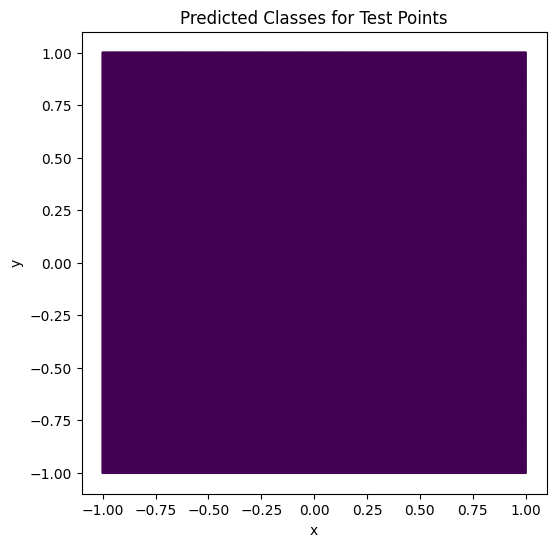

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T
print(points_test)
# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)
pred = torch.argmax(output_test,dim=1).numpy()

# Plot the points, colored by their predicted class
plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=pred, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:

input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
b_val_losses = []
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(20000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = loss_fn(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")
        b_val_losses.append(val_loss.item())

0 val_loss: 1.1190754175186157
1000 val_loss: 0.8813247084617615
2000 val_loss: 0.7436760663986206
3000 val_loss: 0.6892157196998596
4000 val_loss: 0.7026393413543701
5000 val_loss: 0.675613284111023
6000 val_loss: 0.6632469296455383
7000 val_loss: 0.6298080682754517
8000 val_loss: 0.6002753376960754
9000 val_loss: 0.6101334691047668
10000 val_loss: 0.5923324823379517
11000 val_loss: 0.5902813076972961
12000 val_loss: 0.5826572775840759
13000 val_loss: 0.5840915441513062
14000 val_loss: 0.5758935809135437
15000 val_loss: 0.5682439208030701
16000 val_loss: 0.5893400311470032
17000 val_loss: 0.5660253167152405
18000 val_loss: 0.5806188583374023
19000 val_loss: 0.5618517994880676


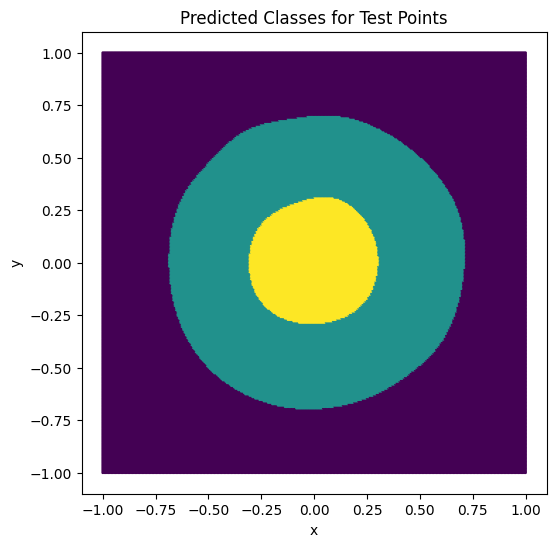

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)
pred = torch.argmax(output_test,dim=1).numpy()

# Plot the points, colored by their predicted class
plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=pred, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

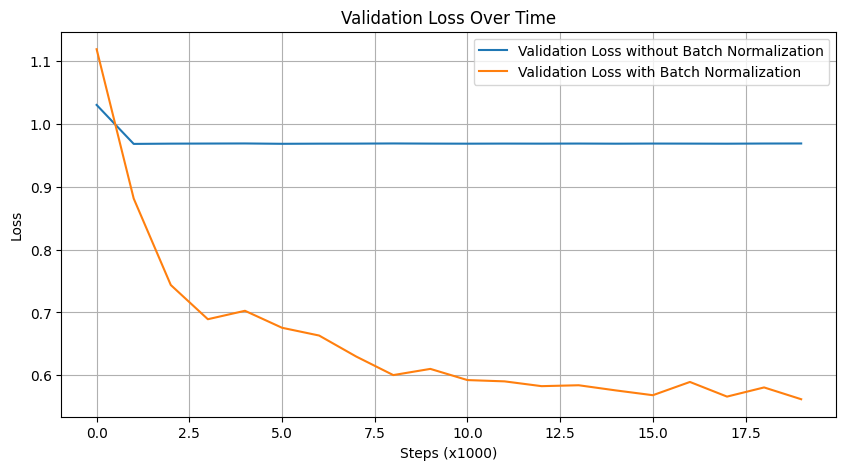

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(val_losses, label='Validation Loss without Batch Normalization')
plt.plot(b_val_losses, label='Validation Loss with Batch Normalization')
plt.title('Validation Loss Over Time')
plt.xlabel('Steps (x1000)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()